# Data Analysis - Lab 4
### M. Sébastien MASCHA & M. Sauvage Pierre
### ISEP Paris – September 24th, 2019
<br/>
<br/>

___

# Exercice B - Hierarchical Clustering
This exercise is a tutorial on how to use scipy's hierarchical clustering.

### Question 1 - Import of libraries

This document has been done using python on Jupyter Notebook with the librairies:

- maths for sqrt, pi, exp
- Numpy to manipulate arrays
- pandas to import csv
- matplotlib to plot graphics
- seaborn to make your charts prettier (built on top of Matplotlib)
- sklearn : tools for data mining and data analysis
- SciPy : a Python-based ecosystem of open-source software for mathematics, science, and engineering. 

In [158]:
# coding: utf-8

import data

from math import sqrt,pi,exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import sklearn
# Normalize data
from sklearn.preprocessing import StandardScaler
# Dimension reduction
from sklearn.decomposition import PCA
# Useful 
import scipy
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from scipy.cluster.hierarchy import cophenet , inconsistent , maxRstat
from scipy.spatial.distance import pdist

### Question 2 - Generate a sample of random data
#### We will use numpy's multivariate_normal from random package
It draws random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

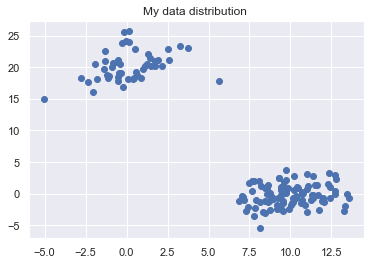

In [159]:
np.random.seed(42) # for repeatability
a = np.random. multivariate_normal([10 , 0] , [[3 , 1] , [1 , 4]] , size =[100 ,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size =[50 ,])
X=np.concatenate((a, b),) 
plt.scatter(X[:,0], X[:,1])
plt.title ( 'My data distribution ') 
plt.show()

Text(0.5, 1.0, 'My data distribution ')

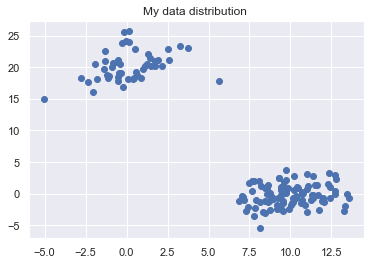

In [160]:
np.random.seed(42) # for repeatability
a = np.random. multivariate_normal([10 , 0] , [[3 , 1] , [1 , 4]] , size =[100 ,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size =[50 ,])
X = np.concatenate((a, b),) 
plt.scatter(X[:,0], X[:,1])
plt.title ( 'My data distribution ') 

### Question 3 - Generate the linkage matrix and visualize the dendrogram
#### Testing different type of linkage
I.e. : 'single', 'complete', 'average', 'euclidean', 'cityblock', 'hamming',' cosine'

Cophenetic Correlation : 0.98 


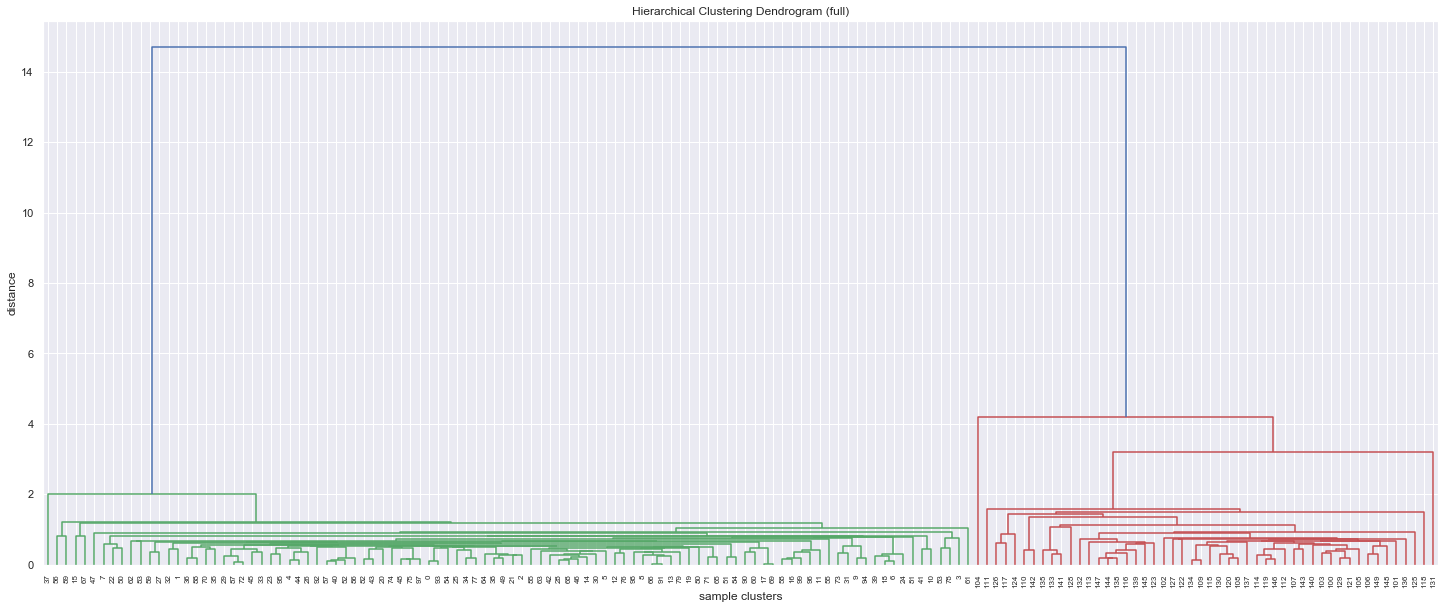

In [161]:
# alternative linkage methods: 'single ', 'complete ', 'average ', 'euclidean ' ( default ) , ' cityblock ' aka Manhattan 'hamming ',' cosine'

Z = linkage(X, 'single' , optimal_ordering=True) # euclidean (default) would have the same result

c, coph_dists = cophenet(Z, pdist(X))
print( 'Cophenetic Correlation : %1.2f ' % c)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dn = dendrogram( Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

#### Euclidean-linkage (default) would have the same result than single.

Cophenetic Correlation : 0.98 


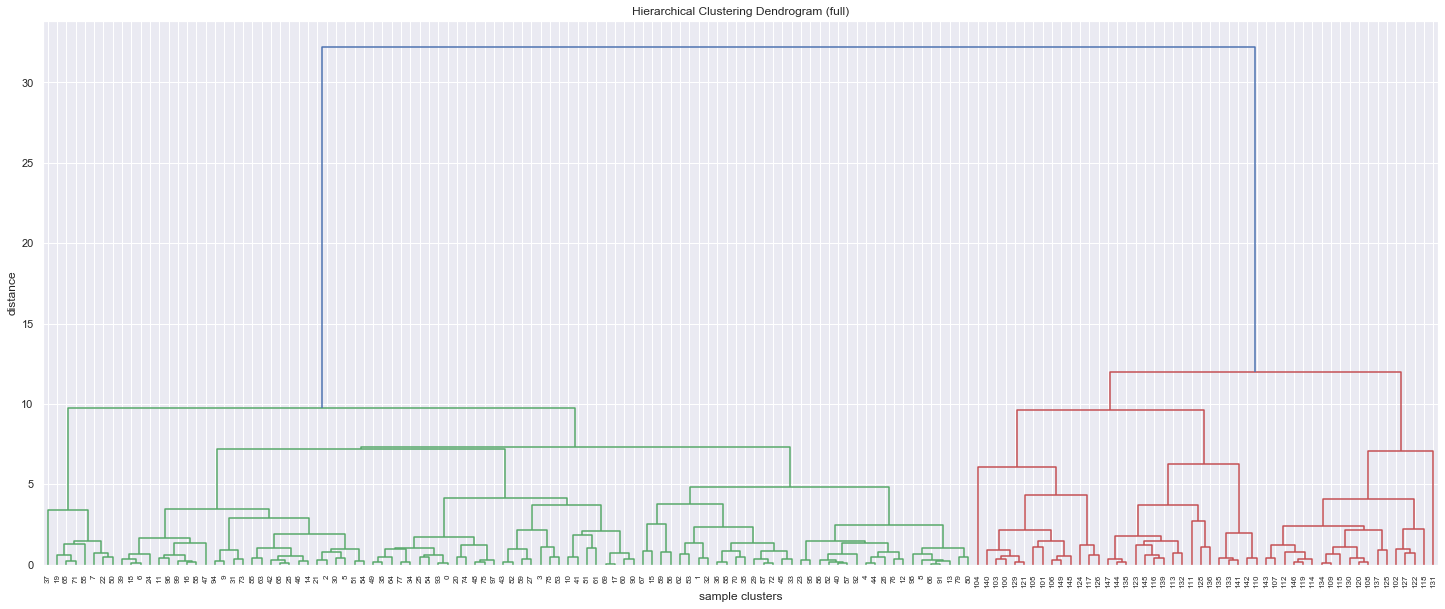

In [162]:
Z = linkage(X, 'complete' , optimal_ordering=True) # average, weighted, centroid, median, would have the same result

c, coph_dists = cophenet(Z, pdist(X))
print( 'Cophenetic Correlation : %1.2f ' % c)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dn = dendrogram( Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

#### Average-linkage, weighted, centroid, median, would have the same result than complete.

### Question 4 - Comment the hierarchical clustering encoded as a linkage matrix.
#### Comprehensive visualization of the clusters
Tree's form remind us the history of the different aggregations.
An agregation at the level i of the dendrogram means these two cluster have the shorter distance (based on the chosen one ; e.g. ward) between all clusters of level i.

#### Highlight hierarchical cluster structures
The length of the two legs of the U-link represents the distance between the child clusters.

### Question 5 - Search for the definition and role of the cophenetic coefficient


The cophenetic coefficient is a mesure that shows how the goodness of fit of our clustering.

It is the intergroup dissimilarity at which the two observations are first combined into a single cluster.

A dendrogram is an appropriate summary of some data if the correlation between the original distances and the cophenetic distances is high

### Question 6 - Simplified version of the dendrogram
Our above dendrogram is pretty big and pretty messy.

We can use different parameters of dendrogram function.

"truncate_mode" parameter defined the method used to truncate our dendrogram. E.g. : we will use 'lastp' to keep the last p merged clusters. "p" is defined as follow :

"p" parameter will defined the number of merged cluster to keep in our dendrogram. It will be the last p merged clusters.

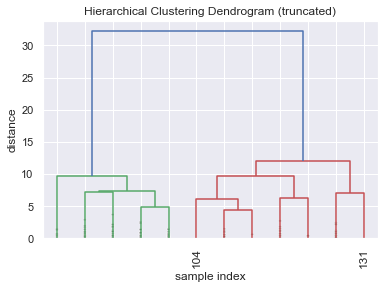

In [163]:

#display truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)') 
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp' , #to explain 
    p=12, #to explain 
    show_leaf_counts=False ,
    leaf_rotation =90., 
    leaf_font_size=12., 
    show_contracted=True,
)
plt.show()

### Question 7 - Cut the dendrogram to obtain the clusters
We want to argue for a certain number of clusters.
#### 1) Method A : distance
Documentation's definition :

*Forms flat clusters so that the original observations in each flat cluster have no greater a cophenetic distance than t.*

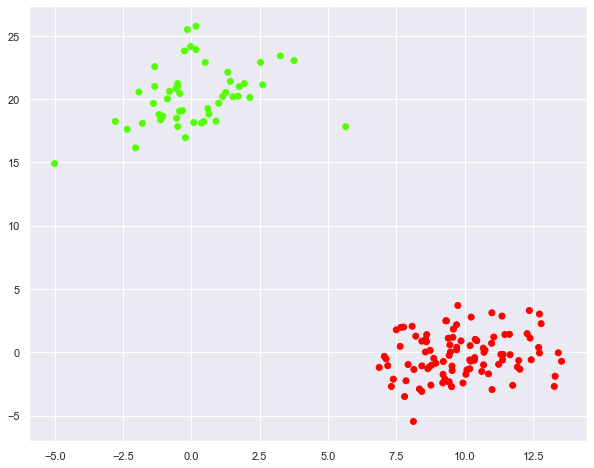

In [164]:
max_d = 20
clusters = fcluster(Z, max_d, criterion='distance')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters , cmap='prism')
plt.show()

#### 2) Method B : maxclust 
Documentation's definition :

*Finds a minimum threshold r so that the cophenetic distance between any two original observations in the same flat cluster is no more than r and no more than t flat clusters are formed.*

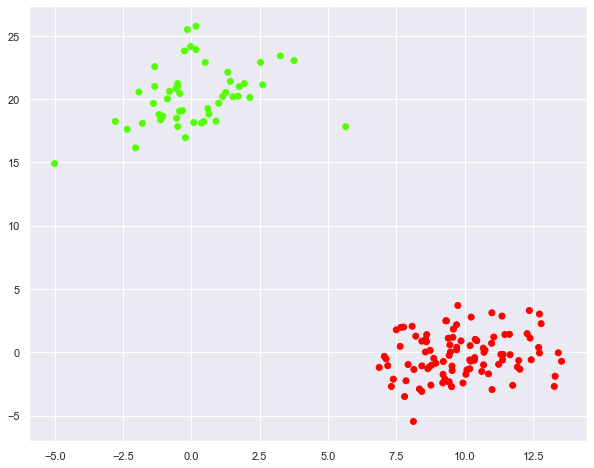

In [165]:
k=2
clusters = fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters , cmap='prism')
plt.show()

#### 3) Comparaison : distance vs maxclust
1. Difference

'distance' method : Thanks to dendrogram we have the distance between clusters. Then we can define a minimum distance to keep clusters. It will be the distance used to build Z with linkage function. We can vizualize this distance with the dendrogram. max_d is fixing the minimum distance (chosen during linkage call) to define a U-link as a cluster that we keep.

'maxclust' method : If we know how many cluster we should keep approximatly, then we'll certainly use this method. It keeps clusters based on dendrogram hierarchy (based on the tree). k is the maximum number of cluster we want to keep.

2. pros and cons

If we know how many clusters we should keep, then 'maxclust' method is definitly the best as it will keep the first k cluster (based on the distance we chose). 

Nonetheless, if we prefer to focus on cophenetic coefficient and how well our clusters are representing our data, we should use 'distance' with an appropriate value.

### Question 8 - Repeat the questions 3 to 7 with a different linkage


#### We will use single-linkage as there is a huge difference compare to complete-linkage used before.
#### Generate the linkage matrix and visualize the dendrogram

Cophenetic Correlation : 0.98 


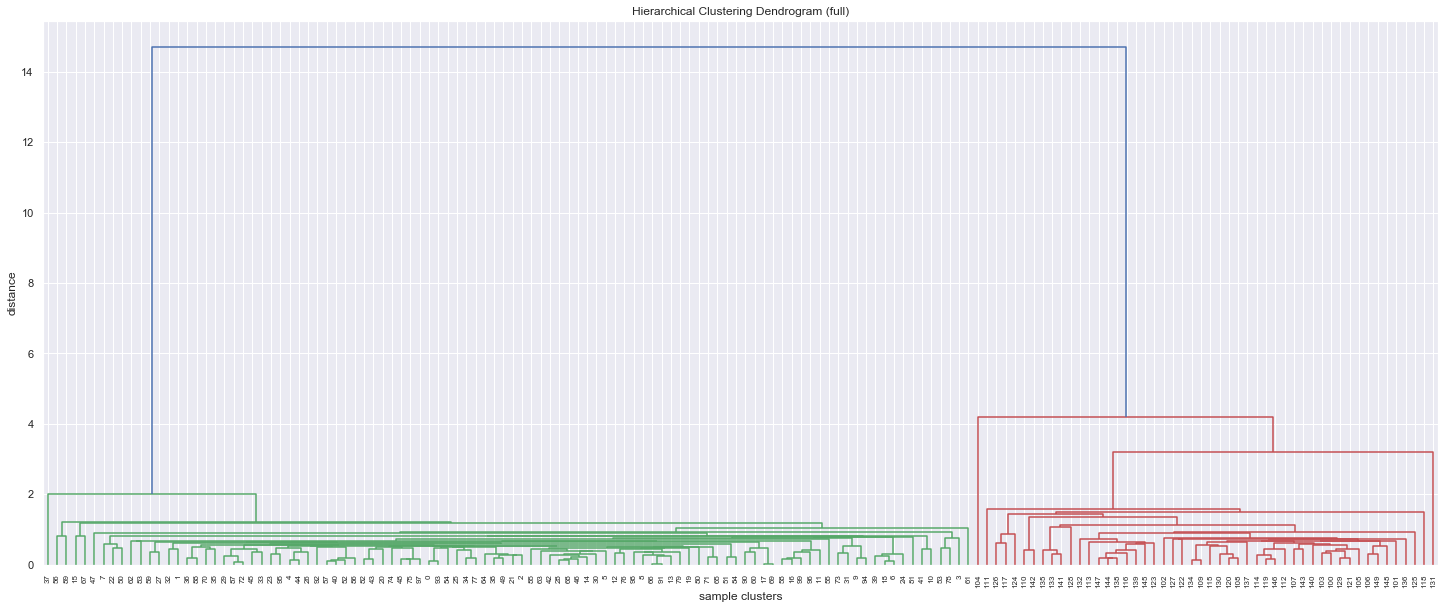

In [166]:
Z = linkage(X, 'single' , optimal_ordering=True) # euclidean (default) would have the same result

c, coph_dists = cophenet(Z, pdist(X))
print( 'Cophenetic Correlation : %1.2f ' % c)

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (full)')
plt.xlabel('sample clusters')
plt.ylabel('distance')
dn = dendrogram( Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

#### Comment the hierarchical clustering encoded as a linkage matrix.
The hierarchical cluster structures is more complexe, the dendrogram formed many clusters with small distance.

### Simplified version of the dendrogram
Our above dendrogram is pretty big and pretty messy.

We can use different parameters of dendrogram function.

"truncate_mode" parameter defined the method used to truncate our dendrogram. E.g. : we will use 'lastp' to keep the last p merged clusters. "p" is defined as follow :

"p" parameter will defined the number of merged cluster to keep in our dendrogram. It will be the last p merged clusters.

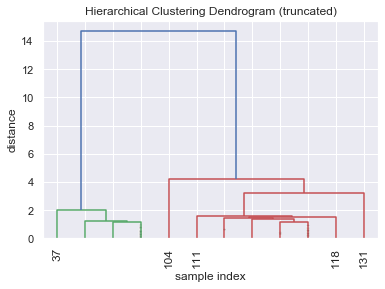

In [167]:
#display truncated dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)') 
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp' , #to explain 
    p=12, #to explain 
    show_leaf_counts=False ,
    leaf_rotation =90., 
    leaf_font_size=12., 
    show_contracted=True,
)
plt.show()

### Cut the dendrogram to obtain the clusters
We want to argue for a certain number of clusters.

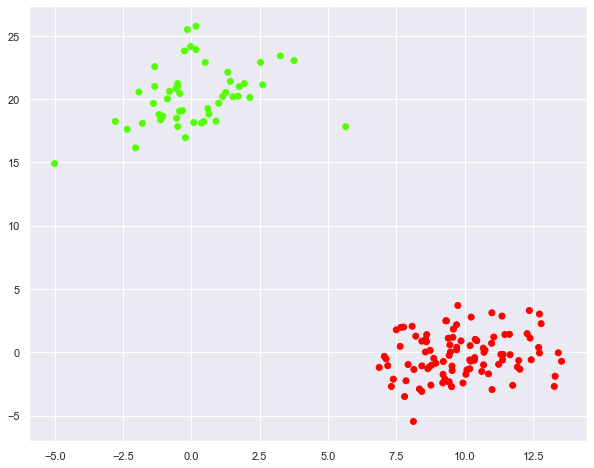

In [168]:
max_d = 14
clusters = fcluster(Z, max_d, criterion='distance')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters , cmap='prism')
plt.show()

#### 2) Method B : maxclust 
Documentation's definition :

*Finds a minimum threshold r so that the cophenetic distance between any two original observations in the same flat cluster is no more than r and no more than t flat clusters are formed.*

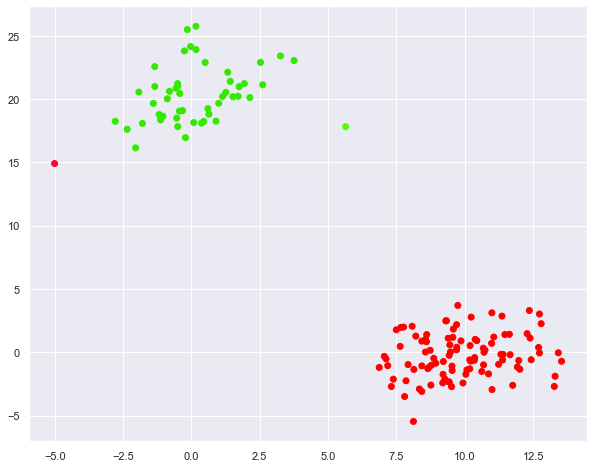

In [169]:
k=4
clusters = fcluster(Z,k,criterion='maxclust')

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters , cmap='prism')
plt.show()

We can see that single-linkage we quickly form clusters with a better cophenetic coefficient.

Cut-off using 'single-linkage' distance appear to form quickly our two cluster compare to 'complete-linkage'. We used max_d=14 ('single-linkage') compare to max_d=20 ('complete-linkage').  Same for maxclust method : k=2 ('single-linkage') compare to k=4 ('complete-linkage').